# Demo AI project 3 Large dataset (~20000 training samples)
<a href="https://colab.research.google.com/github/germanfarinas/AI-Project3/blob/master/AI_project3_largedataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [0]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os   # to save the checkpoint
import pandas as pd
#sess = tf.InteractiveSession()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = r"/content/gdrive/My Drive/Colab Notebooks/Data"  #change dir to your project folder
os.chdir(root_path)
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/Colab Notebooks/Data'

# Example 2 Letter Recognition Dataset

In [0]:
#Prepare the data
def read_dataset():
  file = "letter-recognition.data"
  data = pd.read_csv(file,delim_whitespace=False,header=-1)
  data = np.array(data)
  np.random.shuffle(data)
  # #Training Data
  ratio = 0.8 # train/Total
  training_data = data[0:int(len(data)*ratio)]
  print(training_data)
  testing_data = data[int(len(data)*ratio):len(data)]
  x_train = training_data[:, 1:]
  x_train = x_train.astype(float)
  y_train = training_data[:, 0]
  #y_train = y_train.T[0]=='g'
  #y_train = y_train.astype(int)
  #Testing Data
  x_test = testing_data[:, 1:]
  x_test = x_test.astype(float)
  y_test = testing_data[:, 0]
  #y_test = y_test.T[0]=='g'
  #y_test = y_test.astype(int)
  return x_train,y_train,x_test,y_test

def create_model(N_input,N_hidden,N_output):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(N_hidden,input_dim = N_input, activation='relu')) 
  model.add(tf.keras.layers.Dense(N_output, activation='sigmoid'))
  
  model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
  
  return model

In [0]:
x_train,y_train_,x_test,y_test_ = read_dataset()
print('Training data size:' + str(x_train.shape))
print('Training labels size: ' + str(y_train_.shape))

print('Test data size: ' + str(x_test.shape))
print('Test label size: ' + str(y_test_.shape))

[['R' 6 9 ... 7 7 11]
 ['L' 2 5 ... 7 3 8]
 ['M' 5 9 ... 5 2 8]
 ...
 ['H' 3 6 ... 8 3 6]
 ['T' 2 7 ... 8 0 8]
 ['P' 6 6 ... 10 4 8]]
Training data size:(16000, 16)
Training labels size: (16000,)
Test data size: (4000, 16)
Test label size: (4000,)


### Convert labels to one hot

In [0]:
# change y [1D] to Y [2D] sparse array coding class
n_examples = len(y_train_)
labels = np.unique(y_train_)
y_train = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(y_train_ == labels[ix_label])[0]
    y_train[ix_tmp, ix_label] = 1
print(labels)
print(y_train)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# change y [1D] to Y [2D] sparse array coding class
n_examples = len(y_test_)
labels = np.unique(y_test_)
y_test = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(y_test_ == labels[ix_label])[0]
    y_test[ix_tmp, ix_label] = 1
print(labels)
print(y_test)
print(len(labels))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
26


### Create the model

In [0]:
model = create_model(16,300,26)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 300)               5100      
_________________________________________________________________
dense_17 (Dense)             (None, 26)                7826      
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


### Train the classical model using backpropagation

In [0]:
n_iteration = 100
model.fit(x_train, y_train, batch_size=1000, epochs=n_iteration, shuffle=True)

Epoch 1/100
16000/16000 [==============================] - 0s 12us/sample - loss: 3.3263 - acc: 0.0324
Epoch 2/100
16000/16000 [==============================] - 0s 5us/sample - loss: 3.2129 - acc: 0.0322
Epoch 3/100
16000/16000 [==============================] - 0s 4us/sample - loss: 3.1803 - acc: 0.0325
Epoch 4/100
16000/16000 [==============================] - 0s 4us/sample - loss: 3.1488 - acc: 0.0329
Epoch 5/100
16000/16000 [==============================] - 0s 4us/sample - loss: 3.1145 - acc: 0.0321
Epoch 6/100
16000/16000 [==============================] - 0s 4us/sample - loss: 3.0776 - acc: 0.0324
Epoch 7/100
16000/16000 [==============================] - 0s 4us/sample - loss: 3.0377 - acc: 0.0324
Epoch 8/100
16000/16000 [==============================] - 0s 4us/sample - loss: 2.9946 - acc: 0.0324
Epoch 9/100
16000/16000 [==============================] - 0s 5us/sample - loss: 2.9465 - acc: 0.0325
Epoch 10/100
16000/16000 [==============================] - 0s 4us/sample - loss:

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: %f' %test_acc)

4000/4000 [==============================] - 0s 71us/sample - loss: 0.9906 - acc: 0.7545
Test accuracy: 0.754500


100


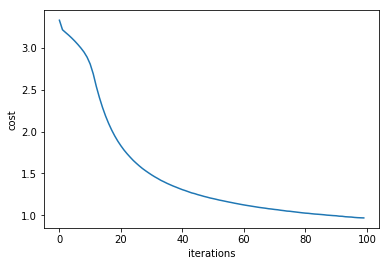

In [0]:
# history. all losses
all_loss = model.history.history['loss'] 
print(len(all_loss))

# show the training errors
plt.plot(np.squeeze(all_loss))
plt.xlabel('iterations');plt.ylabel('cost')
#plt.title('Learning rate %f' %learning_rate)
plt.show()

#PSO Algorithm

In [0]:
def fitness(str_costf,w):
  model_nn.set_weights(w)
  y_hat = model_nn.predict_on_batch(x_train)
  if str_costf == 'LSE':
    cost = np.linalg.norm(y_hat-y_train)**2/(y_train.shape[1]*x_train.shape[0])
  elif str_costf == 'ABS':
    cost = np.sum(np.abs(y_hat-y_train))/(y_train.shape[1]*x_train.shape[0])
  return cost 
def gen_random_weights(NL):
  w = list()
  w_tmp = model_nn.get_weights()
  for i in range(NL):
    w.append(np.random.random_sample(w_tmp[i].shape)*0.8-0.4)
  return w
def list_subst(a,b):
  # c=a-b
  c=list()
  for i in range(len(a)):
    c.append(a[i]-b[i])
  return c
def list_mult(a,const):
  # c=const*a
  c=list()
  for i in range(len(a)):
    c.append(a[i]*const)
  return c 
def list_add(*arglist):
  # d=a+b+c
  d=list()
  if len(arglist)==2:
    for i in range(len(arglist[0])):
      d.append(arglist[0][i]+arglist[1][i])
    return d  
  if len(arglist)==3:
    for i in range(len(arglist[0])):
      d.append(arglist[0][i]+arglist[1][i]+arglist[2][i])
    return d 
def list_limit(a,amin,amax):
  c=list()
  for i in range(len(a)):
    c.append(np.clip(a[i],amin,amax))
  return c

In [0]:
#### PSO Algorithm
NL=3
model_nn = create_model(16,400,26)
Nparticles = 1000
Nepochs = 20
# Create particles with random weigts matrix
particles = list()
vel_particles = list()
for i in range(Nparticles):
  particles.append(gen_random_weights(NL))
  vel_particles.append(gen_random_weights(NL))

In [0]:
c1=2;c2=2;w=1
p_bestid = particles.copy()
p_best = np.ones(Nparticles)*10
g_bestid = list()
g_best = 10
cost = np.zeros(Nepochs)
#w=np.linspace(2.0, 1.0, num=Nepochs)

#Start trining
for k in range(Nepochs):
  #print("Epoch %2d of %2d , best cost = %% 5.2f" %(k,Nepochs,))
  for i in range(Nparticles):
    fit = fitness('ABS',particles[i])
    #print(fit)
    if fit < p_best[i]:
      p_best[i] = fit
      p_bestid.insert(i,particles[i])
  idx = np.argmin(p_best)
  g_bestid = p_bestid[idx].copy()
  #print(len(particles[0]))
  for i in range(Nparticles):
    r1=np.random.rand()
    r2=np.random.rand()
    p_delx = list_subst(p_bestid[i],particles[i])
    g_delx = list_subst(g_bestid   ,particles[i])
    inertia = list_mult(vel_particles[i],w)
    cognitive = list_mult(p_delx,c1*r1)
    social = list_mult(g_delx,c2*r2)
    vid = list_add(inertia,cognitive,social)
    xid = list_add(particles[i],vid)
    vel_particles[i]=list_limit(vid,-1,1)
    particles[i]=list_limit(xid,-1,1)
  cost[k]=p_best[idx]
  #if cost[k]==cost[k-1]):
  #  w = w*0.9
  #  print(w)
  print("Epoch %2d of %2d , best cost = %8.6f" %(k,Nepochs,cost[k]))
model_nn.set_weights(g_bestid)

Epoch  0 of 20 , best cost = 0.278203
Epoch  1 of 20 , best cost = 0.229827
Epoch  2 of 20 , best cost = 0.165679
Epoch  3 of 20 , best cost = 0.142845
Epoch  4 of 20 , best cost = 0.142845
Epoch  5 of 20 , best cost = 0.142845
Epoch  6 of 20 , best cost = 0.142845
Epoch  7 of 20 , best cost = 0.142845
Epoch  8 of 20 , best cost = 0.142845
Epoch  9 of 20 , best cost = 0.142845
Epoch 10 of 20 , best cost = 0.136666
Epoch 11 of 20 , best cost = 0.105996
Epoch 12 of 20 , best cost = 0.096349
Epoch 13 of 20 , best cost = 0.084517
Epoch 14 of 20 , best cost = 0.082478
Epoch 15 of 20 , best cost = 0.076090
Epoch 16 of 20 , best cost = 0.072419
Epoch 17 of 20 , best cost = 0.053876
Epoch 18 of 20 , best cost = 0.046799
Epoch 19 of 20 , best cost = 0.043485


In [0]:
model_nn.set_weights(g_bestid)
test_loss, test_acc = model_nn.evaluate(x_test, y_test)
print('Test accuracy: %f' %test_acc)

4000/4000 [==============================] - 0s 70us/sample - loss: 2.3412 - acc: 0.0335
Test accuracy: 0.033500
